# Table of Contents
1. [Problem Statement](#problem_statement)
2. [Data Understanding and Exploration](#eda)
3. [Data Cleaning](#data_cleaning)
4. [Creating Dummy Variables](#dummy)
5. [Train-Test split](#train_split)
6. [Recursive feature elimination](#rfe)
7. [Model Building and Evaluation](#model_eval)
8. [Linear Regression](#linear)
8. [Ridge Regression](#ridge)
8. [Lasso Regression](#lasso)



- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)

##  1. Problem statement <a name="problem_statement"></a> 
A US-based housing company named Surprise Housing has decided to enter the Australian market.
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [2]:
# suppressing warning
import warnings
warnings.filterwarnings('ignore')

## 2. Data Understanding and Exploration <a name="eda"></a> 

In [3]:
# import train.csv
housing = pd.read_csv('train.csv')

#### Inspecting dataframe

In [4]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
len(housing.index)

1460

In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
housing.shape

(1460, 81)

In [9]:
housing.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [10]:
# Reading the description file
with open("data_description.txt") as f:
    print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [11]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [12]:
# Numerical and Categorical values
housing.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [13]:
# since we are unable to see all columns
for column in housing:
    print(column,'\t',housing[column].dtypes)

Id 	 int64
MSSubClass 	 int64
MSZoning 	 object
LotFrontage 	 float64
LotArea 	 int64
Street 	 object
Alley 	 object
LotShape 	 object
LandContour 	 object
Utilities 	 object
LotConfig 	 object
LandSlope 	 object
Neighborhood 	 object
Condition1 	 object
Condition2 	 object
BldgType 	 object
HouseStyle 	 object
OverallQual 	 int64
OverallCond 	 int64
YearBuilt 	 int64
YearRemodAdd 	 int64
RoofStyle 	 object
RoofMatl 	 object
Exterior1st 	 object
Exterior2nd 	 object
MasVnrType 	 object
MasVnrArea 	 float64
ExterQual 	 object
ExterCond 	 object
Foundation 	 object
BsmtQual 	 object
BsmtCond 	 object
BsmtExposure 	 object
BsmtFinType1 	 object
BsmtFinSF1 	 int64
BsmtFinType2 	 object
BsmtFinSF2 	 int64
BsmtUnfSF 	 int64
TotalBsmtSF 	 int64
Heating 	 object
HeatingQC 	 object
CentralAir 	 object
Electrical 	 object
1stFlrSF 	 int64
2ndFlrSF 	 int64
LowQualFinSF 	 int64
GrLivArea 	 int64
BsmtFullBath 	 int64
BsmtHalfBath 	 int64
FullBath 	 int64
HalfBath 	 int64
BedroomAbvGr 	 int64
Kitche

## 3. Data Cleaning <a name="data_cleaning"></a> 

In [14]:
# from the housing.info we know that there are 1460 rows, let's find out the percentange of null values by columns
cols = housing.columns
print("Column Name - Number of nan values - Percentage of total nan")
for col in cols:
    print(col, " - ", housing[col].isna().sum(), " - ", round((housing[col].isna().sum() / 1460)*100,2))

Column Name - Number of nan values - Percentage of total nan
Id  -  0  -  0.0
MSSubClass  -  0  -  0.0
MSZoning  -  0  -  0.0
LotFrontage  -  259  -  17.74
LotArea  -  0  -  0.0
Street  -  0  -  0.0
Alley  -  1369  -  93.77
LotShape  -  0  -  0.0
LandContour  -  0  -  0.0
Utilities  -  0  -  0.0
LotConfig  -  0  -  0.0
LandSlope  -  0  -  0.0
Neighborhood  -  0  -  0.0
Condition1  -  0  -  0.0
Condition2  -  0  -  0.0
BldgType  -  0  -  0.0
HouseStyle  -  0  -  0.0
OverallQual  -  0  -  0.0
OverallCond  -  0  -  0.0
YearBuilt  -  0  -  0.0
YearRemodAdd  -  0  -  0.0
RoofStyle  -  0  -  0.0
RoofMatl  -  0  -  0.0
Exterior1st  -  0  -  0.0
Exterior2nd  -  0  -  0.0
MasVnrType  -  8  -  0.55
MasVnrArea  -  8  -  0.55
ExterQual  -  0  -  0.0
ExterCond  -  0  -  0.0
Foundation  -  0  -  0.0
BsmtQual  -  37  -  2.53
BsmtCond  -  37  -  2.53
BsmtExposure  -  38  -  2.6
BsmtFinType1  -  37  -  2.53
BsmtFinSF1  -  0  -  0.0
BsmtFinType2  -  38  -  2.6
BsmtFinSF2  -  0  -  0.0
BsmtUnfSF  -  0  -

#### Inference
From the above step, we found following features are the significantly missing around (>30%):
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

we found following features are missing but are low in numbers hence we will impute it by replacing with mean/ median:
- LotFrontage
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond

In [15]:
# dropping off the significantly nan columns
housing.drop(columns=["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature","Id"], axis=1, inplace=True)

In [16]:
housing.shape

(1460, 75)

In [17]:
columns_to_replace = ['LotFrontage', 'MasVnrType', 'BsmtQual',
                      'BsmtQual', 'BsmtCond', 'BsmtExposure',
                      'BsmtFinType1','BsmtFinType2','Electrical',
                      'Electrical', 'GarageType', 'GarageYrBlt',
                      'GarageFinish', 'GarageQual', 'GarageCond']
def calculate_mean_mode(c):
    if housing[c].dtype == np.float64 or housing[c].dtype == np.int64:
        return housing[c].mean()
    else:
        print(c, "-", housing[c].mode())
        return housing[c].mode()

for column_to_replace in columns_to_replace:
    housing[column_to_replace] =housing[column_to_replace].fillna(value= calculate_mean_mode(column_to_replace))


MasVnrType - 0    None
dtype: object
BsmtQual - 0    TA
dtype: object
BsmtQual - 0    TA
dtype: object
BsmtCond - 0    TA
dtype: object
BsmtExposure - 0    No
dtype: object
BsmtFinType1 - 0    Unf
dtype: object
BsmtFinType2 - 0    Unf
dtype: object
Electrical - 0    SBrkr
dtype: object
Electrical - 0    SBrkr
dtype: object
GarageType - 0    Attchd
dtype: object
GarageFinish - 0    Unf
dtype: object
GarageQual - 0    TA
dtype: object
GarageCond - 0    TA
dtype: object


In [18]:
print("Column Name - Number of nan values - Percentage of total nan")
for col in housing.columns:
    print(col, " - ", housing[col].isna().sum(), " - ", round((housing[col].isna().sum() / 1460)*100,2))

Column Name - Number of nan values - Percentage of total nan
MSSubClass  -  0  -  0.0
MSZoning  -  0  -  0.0
LotFrontage  -  0  -  0.0
LotArea  -  0  -  0.0
Street  -  0  -  0.0
LotShape  -  0  -  0.0
LandContour  -  0  -  0.0
Utilities  -  0  -  0.0
LotConfig  -  0  -  0.0
LandSlope  -  0  -  0.0
Neighborhood  -  0  -  0.0
Condition1  -  0  -  0.0
Condition2  -  0  -  0.0
BldgType  -  0  -  0.0
HouseStyle  -  0  -  0.0
OverallQual  -  0  -  0.0
OverallCond  -  0  -  0.0
YearBuilt  -  0  -  0.0
YearRemodAdd  -  0  -  0.0
RoofStyle  -  0  -  0.0
RoofMatl  -  0  -  0.0
Exterior1st  -  0  -  0.0
Exterior2nd  -  0  -  0.0
MasVnrType  -  8  -  0.55
MasVnrArea  -  8  -  0.55
ExterQual  -  0  -  0.0
ExterCond  -  0  -  0.0
Foundation  -  0  -  0.0
BsmtQual  -  37  -  2.53
BsmtCond  -  37  -  2.53
BsmtExposure  -  38  -  2.6
BsmtFinType1  -  37  -  2.53
BsmtFinSF1  -  0  -  0.0
BsmtFinType2  -  38  -  2.6
BsmtFinSF2  -  0  -  0.0
BsmtUnfSF  -  0  -  0.0
TotalBsmtSF  -  0  -  0.0
Heating  -  0 

In [19]:
housing.isna().sum().sum()
# only about 0.4%

528

#### Dropping off the rows with nan value (only about 0.4%)

In [20]:
housing.dropna(axis="index", inplace=True)

In [21]:
# Verification
print(housing.isna().sum().sum())
print(housing.shape)

0
(1338, 75)


In [22]:
for col in housing.columns:
    print(col, " - ", housing[col].isna().sum(), " - ", round((housing[col].isna().sum() / 1338)*100,2))

MSSubClass  -  0  -  0.0
MSZoning  -  0  -  0.0
LotFrontage  -  0  -  0.0
LotArea  -  0  -  0.0
Street  -  0  -  0.0
LotShape  -  0  -  0.0
LandContour  -  0  -  0.0
Utilities  -  0  -  0.0
LotConfig  -  0  -  0.0
LandSlope  -  0  -  0.0
Neighborhood  -  0  -  0.0
Condition1  -  0  -  0.0
Condition2  -  0  -  0.0
BldgType  -  0  -  0.0
HouseStyle  -  0  -  0.0
OverallQual  -  0  -  0.0
OverallCond  -  0  -  0.0
YearBuilt  -  0  -  0.0
YearRemodAdd  -  0  -  0.0
RoofStyle  -  0  -  0.0
RoofMatl  -  0  -  0.0
Exterior1st  -  0  -  0.0
Exterior2nd  -  0  -  0.0
MasVnrType  -  0  -  0.0
MasVnrArea  -  0  -  0.0
ExterQual  -  0  -  0.0
ExterCond  -  0  -  0.0
Foundation  -  0  -  0.0
BsmtQual  -  0  -  0.0
BsmtCond  -  0  -  0.0
BsmtExposure  -  0  -  0.0
BsmtFinType1  -  0  -  0.0
BsmtFinSF1  -  0  -  0.0
BsmtFinType2  -  0  -  0.0
BsmtFinSF2  -  0  -  0.0
BsmtUnfSF  -  0  -  0.0
TotalBsmtSF  -  0  -  0.0
Heating  -  0  -  0.0
HeatingQC  -  0  -  0.0
CentralAir  -  0  -  0.0
Electrical  - 

#### Checking outliers
- Reference: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
- From the reference applying the  method to remove outliers

In [23]:
housing.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1338.000000  1338.000000    1338.000000  1338.000000  1338.000000   
mean     56.136024    70.630187   10706.294469     6.219731     5.596413   
std      41.252576    22.161578   10336.621126     1.324472     1.078124   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    60.000000    7744.000000     5.000000     5.000000   
50%      50.000000    70.049958    9600.000000     6.000000     5.000000   
75%      70.000000    80.000000   11760.750000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1338.000000   1338.000000  1338.000000  1338.000000  1338.000000  ...   
mean   1973.029148   1985.668909   110.360239   464.234679    49.218236  ...   
std      29.563540     20.296463   185.604816   458.792420   166.196584  ...   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1956.000000   1968.000000     0.000000     0.000000     0.000000  ...   
50%    1976.000000   1994.500000     0.000000   413.000000     0.000000  ...   
75%    2001.000000   2004.000000   174.000000   733.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1338.000000  1338.000000    1338.000000  1338.000000   1338.00000   
mean     99.384903    47.782511      21.263827     3.585949     16.43423   
std     127.537065    65.362562      60.843964    30.224622     58.05159   
min       0.000000     0.000000       0.000000     0.000000      0.00000   
25%       0.000000     0.000000       0.000000     0.000000      0.00000   
50%       6.000000    28.000000       0.000000     0.000000      0.00000   
75%     174.500000    70.000000       0.000000     0.000000      0.00000   
max     857.000000   547.000000     552.000000   508.000000    480.00000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1338.000000   1338.000000  1338.000000  1338.000000    1338.000000  
mean      3.010463     42.932735     6.331839  2007.805680  186761.782511  
std      41.961337    508.056255     2.699437     1.330691   78913.847668  
min       0.000000      0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000      0.000000     5.000000  2007.000000  135000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  168500.000000  
75%       0.000000      0.000000     8.000000  2009.000000  220000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [24]:
numerics = [np.float64, np.int64]
numeric_columns = housing.select_dtypes(include=numerics)
print(numeric_columns.dtypes)

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [25]:
def remove_outlier(df_in, col_names):
    for col_name in col_names:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [26]:
housing_df =  remove_outlier(housing, numeric_columns)

In [27]:
housing_df.shape

(1282, 75)

In [28]:
housing_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1282.000000  1282.000000    1282.000000  1282.000000  1282.000000   
mean     56.743370    69.868206   10330.863495     6.108424     5.613885   
std      41.715072    21.678967    8594.808723     1.226792     1.081342   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    60.000000    7591.500000     5.000000     5.000000   
50%      50.000000    70.049958    9501.500000     6.000000     5.000000   
75%      70.000000    78.000000   11451.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1282.000000   1282.000000  1282.000000  1282.000000  1282.000000  ...   
mean   1971.908736   1984.887676    96.680187   438.570983    50.167707  ...   
std      29.386550     20.321034   164.197266   431.805033   167.520945  ...   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1955.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1993.000000     0.000000   399.500000     0.000000  ...   
75%    2000.000000   2003.000000   160.000000   700.000000     0.000000  ...   
max    2009.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1282.000000  1282.000000    1282.000000  1282.000000  1282.000000   
mean     95.071763    46.241810      21.779251     3.386115    15.969579   
std     124.085386    64.999063      61.338076    29.410920    57.010975   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    66.000000       0.000000     0.000000     0.000000   
max     736.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1282.000000   1282.000000  1282.000000  1282.000000    1282.000000  
mean      2.709048     44.808112     6.328393  2007.806552  176086.351794  
std      39.992393    518.961506     2.696565     1.331192   58502.553213  
min       0.000000      0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000      0.000000     5.000000  2007.000000  134000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  165000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  210000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  345000.000000  

[8 rows x 37 columns]

##### Inference
Now after removing outliers and handling missing values, we are left with 1282 rows and 76 columns

#### Ploting graph to check if sales price is normally distributed

<AxesSubplot:ylabel='Density'>

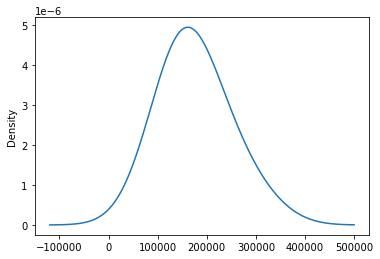

In [29]:
housing_df['SalePrice'].plot.kde(bw_method=1)

#### Handling year built on

Latest house built:  2009
Oldest house built:  1880


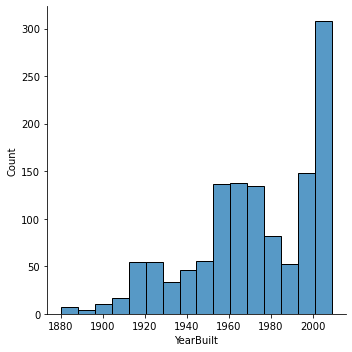

In [30]:
print("Latest house built: ",housing_df['YearBuilt'].max())
print("Oldest house built: ",housing_df['YearBuilt'].min())
yearBuilt_dist = sns.displot(housing_df['YearBuilt'])

In [31]:
# let's find out the correlation among year built the garage built 
housing_df[['YearBuilt', 'GarageYrBlt']].corr()

YearBuilt  GarageYrBlt
YearBuilt     1.000000     0.821199
GarageYrBlt   0.821199     1.000000

In [32]:
# since its higly correlated, let's drop column GarageYrBlt
housing_df.drop(['GarageYrBlt'], axis=1, inplace=True)

#### Since we know most about the distribution of house built let's classify as below based on year built
- New < 2 years (2007-2009)
- Fairly_New < 10 years (1998-2006)
- Old < 40 years (1979-1998)
- Very_Old > 40 years (...-1978)


In [33]:
def classifyBuilt(year):
    if year<=2009 & year>=2007:
        return 'New'
    elif year<=2006 & year>=1998:
        return 'Fairly_New'
    elif year<=2005 & year>=1979:
        return 'Old'
    else:
        return 'Very_Old'

housing_df['yearBuiltClass'] =  housing_df['YearBuilt'].apply(classifyBuilt)

In [34]:
housing_df['yearBuiltClass'].unique()

array(['Very_Old', 'Old', 'Fairly_New', 'New'], dtype=object)

In [35]:
# drop column YearBuilt
housing_df.drop(['YearBuilt'], axis=1, inplace=True)

## 4. Creating Dummy Variables  <a name="dummy"></a> 


In [36]:
# creating dummy variables for categorical variables
# subset all categorical variables
housing_categorical = housing_df.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional GarageType  \
0      CollgCr       Norm       Norm  ...          Gd        Typ     Attchd   
1      Veenker      Feedr       Norm  ...          TA        Typ     Attchd   
2      CollgCr       Norm       Norm  ...          Gd        Typ     Attchd   
3      Crawfor       Norm       Norm  ...          Gd        Typ     Detchd   
4      NoRidge       Norm       Norm  ...          Gd        Typ     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  yearBuiltClass  
0       Very_Old  
1       Very_Old  
2            Old  
3       Very_Old  
4     Fairly_New  

[5 rows x 39 columns]

In [37]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0  ...             0            1                      0   
1  ...             0            1                      0   
2  ...             0            1                      0   
3  ...             0            1                      0   
4  ...             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  yearBuiltClass_New  yearBuiltClass_Old  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   1   
3                      0                   0                   0   
4                      0                   0                   0   

   yearBuiltClass_Very_Old  
0                        1  
1                        1  
2                        0  
3                        1  
4                        0  

[5 rows x 194 columns]

In [38]:
X = housing_df.loc[:, housing_df.columns != 'SalePrice']
y = housing_df['SalePrice']

In [39]:
# dropping off the categorical variable
X = X.drop(list(housing_categorical), axis=1)

In [40]:
# concat dummy variable with X
X = pd.concat([X, housing_dummies], axis=1)

## 5. Test-Train split  <a name="train_split"></a> 

In [41]:
from sklearn.model_selection import train_test_split

# # We specify this so that the train and test data set always have the same rows, respectively


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
X_train.shape

(897, 228)

In [43]:
X_test.shape

(385, 228)

##### Rescaling the Features 
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
numerics = [np.float64, np.int64]
numeric_columns = X_train.select_dtypes(include=numerics)
print(list(numeric_columns.columns))
list_of_numeric_colums = list(numeric_columns.columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [47]:
X_train[list_of_numeric_colums]= scaler.fit_transform(X_train[list_of_numeric_colums])

In [48]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
94      0.235294     0.164384  0.048167        0.500     0.428571   
740     0.294118     0.133562  0.049778        0.375     0.714286   
1435    0.000000     0.202055  0.042425        0.500     1.000000   
439     0.176471     0.157534  0.066655        0.500     0.857143   
860     0.176471     0.116438  0.037780        0.625     0.857143   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
94        0.783333    0.000000    0.286726         0.0   0.092292  ...   
740       0.866667    0.000000    0.000000         0.0   0.138437  ...   
1435      0.916667    0.148125    0.000000         0.0   0.691662  ...   
439       0.833333    0.000000    0.000000         0.0   0.358679  ...   
860       0.800000    0.000000    0.000000         0.0   0.478238  ...   

      SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
94               0            1                      0                     0   
740              0            1                      0                     0   
1435             0            0                      0                     0   
439              0            0                      0                     0   
860              0            1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
94                       0                     1                      0   
740                      0                     0                      0   
1435                     0                     0                      0   
439                      0                     1                      0   
860                      0                     1                      0   

      yearBuiltClass_New  yearBuiltClass_Old  yearBuiltClass_Very_Old  
94                     0                   0                        1  
740                    0                   0                        1  
1435                   0                   0                        1  
439                    0                   0                        1  
860                    0                   0                        1  

[5 rows x 228 columns]

In [49]:
X_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  897.000000   897.000000  897.000000   897.000000   897.000000   
mean     0.210833     0.169659    0.054939     0.511288     0.513935   
std      0.241222     0.071430    0.054434     0.151587     0.152699   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.133562    0.038748     0.375000     0.428571   
50%      0.176471     0.167979    0.049778     0.500000     0.428571   
75%      0.294118     0.198630    0.062071     0.625000     0.571429   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    897.000000  897.000000  897.000000  897.000000  897.000000  ...   
mean       0.572427    0.064558    0.200158    0.036403    0.291295  ...   
std        0.338997    0.108982    0.183251    0.121493    0.223644  ...   
min        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%        0.283333    0.000000    0.000000    0.000000    0.113267  ...   
50%        0.700000    0.000000    0.185398    0.000000    0.239643  ...   
75%        0.883333    0.105625    0.322124    0.000000    0.416361  ...   
max        1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count    897.000000   897.000000                  897.0            897.000000   
mean       0.001115     0.880713                    0.0              0.005574   
std        0.033389     0.324306                    0.0              0.074493   
min        0.000000     0.000000                    0.0              0.000000   
25%        0.000000     1.000000                    0.0              0.000000   
50%        0.000000     1.000000                    0.0              0.000000   
75%        0.000000     1.000000                    0.0              0.000000   
max        1.000000     1.000000                    0.0              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
count            897.000000            897.000000             897.000000   
mean               0.017837              0.837235               0.070234   
std                0.132433              0.369357               0.255684   
min                0.000000              0.000000               0.000000   
25%                0.000000              1.000000               0.000000   
50%                0.000000              1.000000               0.000000   
75%                0.000000              1.000000               0.000000   
max                1.000000              1.000000               1.000000   

       yearBuiltClass_New  yearBuiltClass_Old  yearBuiltClass_Very_Old  
count          897.000000          897.000000               897.000000  
mean             0.020067            0.073579                 0.795987  
std              0.140307            0.261230                 0.403204  
min              0.000000            0.000000                 0.000000  
25%              0.000000            0.000000                 1.000000  
50%              0.000000            0.000000                 1.000000  
75%              0.000000            0.000000                 1.000000  
max              1.000000            1.000000                 1.000000  

[8 rows x 228 columns]

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (16, 10))
#sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
#plt.show()

## 6 Recursive feature elimination  <a name="rfe"></a> 

In [51]:
## Feature Selection using RFE

In [52]:
lr = LinearRegression(normalize=True)

In [53]:
rfe = RFE(lr, n_features_to_select=50, verbose=3)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
F

In [54]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 71),
 ('LotFrontage', False, 172),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 115),
 ('MasVnrArea', False, 39),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 80),
 ('BsmtHalfBath', False, 141),
 ('FullBath', False, 106),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 156),
 ('Fireplaces', False, 96),
 ('GarageCars', False, 24),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 30),
 ('EnclosedPorch', False, 167),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 69),
 ('PoolArea', False, 43),
 ('MiscVal', False, 95),
 ('MoSold', False, 131),
 ('YrSold', False, 160),
 ('MSZoning_FV', False, 3),
 ('MSZoning_RH', False, 5),
 ('MSZoning_RL'

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       'LandSlope_Sev', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Wood',
       'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'SaleType_ConLI', 'SaleType_Oth'],
      dtype='object'

In [58]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces',
       ...
       'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'yearBuiltClass_New', 'yearBuiltClass_Old',
       'yearBuiltClass_Very_Old'],
      dtype='object', length=178)

In [59]:
#conda install -c conda-forge statsmodels

In [60]:
# let's replace 
X_train = X_train[col]
X_test = X_test[col]

In [61]:
X_train.shape

(897, 50)

In [62]:
 X_test.shape

(385, 50)

## 7 Model Building and Evaluation  <a name="model_eval"></a> 

### 8 Linear Regression  <a name="linear"></a> 

Let's now try predicting house price, a dataset using linear regression

In [63]:
# Instantiate
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-8099.722308037308
[ 1.40018768e+05  1.42849423e+05  4.21330372e+04  6.73108906e+04
  2.98102885e+04  2.49052096e+04  8.03024111e+04  5.71381860e+04
  6.16690402e+04 -1.78684542e+04  5.76233504e+04 -2.09957111e+04
 -7.08317294e+04  5.49320039e+04 -6.41967351e+04  2.32745521e+04
  2.84821549e+04  1.99382240e+04 -2.77997024e+04  4.36557457e-11
 -3.44767944e+05 -9.55187589e+04  9.07607477e+04 -2.60879767e+04
  4.76459374e+04  4.96393431e+04 -1.09793325e+04  5.86003925e+03
 -3.54808548e+04 -3.05971557e+04 -5.67113176e+04  6.54836185e-11
 -1.28693500e-10 -4.72937245e-11  4.82638297e+04 -1.38584693e+03
 -9.94183148e+02  2.38003008e+03 -2.40676123e+04 -1.21338038e+05
 -3.17870901e+00  1.69962908e+04 -8.78536971e+03  7.40875534e+03
 -3.81021231e+02  3.66640452e+02  1.12270012e+04  4.40387732e+03
 -2.28713017e+04  3.55965914e+04]


In [65]:
from sklearn.metrics import r2_score, mean_squared_error

In [66]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8796890981201987
-1264357134.6494138
367815720323.29175
1.6778962071224205e+21
410050970.26008
4.3581719665517414e+18


## 9. Ridge Regression  <a name="ridge"></a> 

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.08039880e+05  1.43636844e+05  4.07182036e+04  6.40263887e+04
  2.75341557e+04  2.27301664e+04  7.53812764e+04  5.52774649e+04
  5.70023188e+04 -1.68854844e+04  5.47766210e+04 -1.41530429e+04
 -6.81760771e+04  5.70588225e+04 -4.04444949e+04  2.55819879e+04
  2.95697865e+04  2.00839195e+04 -2.62437825e+04  0.00000000e+00
 -2.51175915e+05 -3.20318563e+04  4.06732356e+04 -2.01836168e+04
  2.88294646e+04  2.66994432e+04 -3.90719417e+03  4.14112884e+03
 -1.82034530e+04 -1.73757727e+04 -4.24155821e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.85030461e+04 -2.95638590e+03
 -4.61327929e+01  3.00251869e+03 -2.03605370e+04 -8.45202624e+04
 -1.06418890e+03  1.66817653e+04 -6.48352559e+03  6.22479634e+03
 -2.98494370e+02  1.11829127e+03  9.80392538e+03  4.73512482e+03
 -2.12698427e+04  2.60405544e+04]


In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8758018183167321
-806092077.617323
379699951915.5271
1.0697443018018225e+21
423299834.91140145
2.778556628056682e+18


## 10. Lasso Regression  <a name="lasso"></a> 

In [70]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [72]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised

alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [73]:
lasso.coef_

array([  89975.67129587,  149754.93418543,   38329.97353374,
         38364.47219104,    7562.69174598,      -0.        ,
        111765.18719501,   86211.05219043,   74922.58235339,
         -1992.92004994,       0.        ,   -9075.22075076,
        -64052.19402672,   56879.50972059,  -15697.6006535 ,
         24018.81299811,   27570.79705557,   18487.11681497,
        -16734.64081189,       0.        , -277522.5785792 ,
             0.        ,       0.        ,  -10628.85393893,
             0.        ,       0.        ,       0.        ,
             0.        ,      -0.        ,      -0.        ,
        -10949.23995865,       0.        ,       0.        ,
             0.        ,    3429.89425029,   -3252.23642295,
            -0.        ,    2398.07179438,   -6953.67323439,
        -48266.96968893,   -5479.43372316,    7422.25057384,
            -0.        ,       0.        ,    -724.30916532,
             0.        ,       0.        ,    2515.13916612,
         -9343.94361133,

In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8704210503111907
-579241608.5530889
396150090921.4502
7.686968122162823e+20
441638897.348328
1.996615096665668e+18


In [75]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.796891e-01      8.758018e-01      8.704211e-01
1   R2 Score (Test)      -1.264357e+09     -8.060921e+08     -5.792416e+08
2       RSS (Train)       3.678157e+11      3.797000e+11      3.961501e+11
3        RSS (Test)       1.677896e+21      1.069744e+21      7.686968e+20
4       MSE (Train)       2.024972e+04      2.057425e+04      2.101521e+04
5        MSE (Test)       2.087624e+09      1.666900e+09      1.413016e+09

In [76]:
betas = pd.DataFrame(index=X[col].columns)

In [77]:
betas.rows = X[col].columns

In [78]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [79]:
pd.set_option('display.max_rows', None)
betas.head(50)

Linear          Ridge          Lasso
LotArea               1.400188e+05  108039.880023   89975.671296
OverallQual           1.428494e+05  143636.843623  149754.934185
OverallCond           4.213304e+04   40718.203636   38329.973534
BsmtFinSF1            6.731089e+04   64026.388674   38364.472191
BsmtFinSF2            2.981029e+04   27534.155722    7562.691746
BsmtUnfSF             2.490521e+04   22730.166391      -0.000000
TotalBsmtSF           8.030241e+04   75381.276375  111765.187195
1stFlrSF              5.713819e+04   55277.464918   86211.052190
2ndFlrSF              6.166904e+04   57002.318758   74922.582353
LowQualFinSF         -1.786845e+04  -16885.484355   -1992.920050
GrLivArea             5.762335e+04   54776.620957       0.000000
BedroomAbvGr         -2.099571e+04  -14153.042875   -9075.220751
KitchenAbvGr         -7.083173e+04  -68176.077082  -64052.194027
GarageArea            5.493200e+04   57058.822529   56879.509721
LandSlope_Sev        -6.419674e+04  -40444.494887  -15697.600654
Neighborhood_NoRidge  2.327455e+04   25581.987924   24018.812998
Neighborhood_NridgHt  2.848215e+04   29569.786484   27570.797056
Neighborhood_Somerst  1.993822e+04   20083.919517   18487.116815
Condition2_Feedr     -2.779970e+04  -26243.782504  -16734.640812
Condition2_PosA       4.365575e-11       0.000000       0.000000
Condition2_PosN      -3.447679e+05 -251175.914581 -277522.578579
Condition2_RRAe      -9.551876e+04  -32031.856350       0.000000
RoofStyle_Shed        9.076075e+04   40673.235645       0.000000
RoofMatl_CompShg     -2.608798e+04  -20183.616835  -10628.853939
RoofMatl_Membran      4.764594e+04   28829.464642       0.000000
RoofMatl_Metal        4.963934e+04   26699.443237       0.000000
RoofMatl_Roll        -1.097933e+04   -3907.194173       0.000000
RoofMatl_Tar&Grv      5.860039e+03    4141.128841       0.000000
RoofMatl_WdShake     -3.548085e+04  -18203.452995      -0.000000
RoofMatl_WdShngl     -3.059716e+04  -17375.772718      -0.000000
Exterior1st_BrkComm  -5.671132e+04  -42415.582099  -10949.239959
Exterior1st_CBlock    6.548362e-11       0.000000       0.000000
Exterior1st_ImStucc  -1.286935e-10       0.000000       0.000000
Exterior2nd_CBlock   -4.729372e-11       0.000000       0.000000
Exterior2nd_Other     4.826383e+04   38503.046075    3429.894250
ExterCond_Fa         -1.385847e+03   -2956.385901   -3252.236423
ExterCond_Gd         -9.941831e+02     -46.132793      -0.000000
ExterCond_TA          2.380030e+03    3002.518694    2398.071794
Foundation_Wood      -2.406761e+04  -20360.537027   -6953.673234
Functional_Sev       -1.213380e+05  -84520.262395  -48266.969689
GarageQual_Fa        -3.178709e+00   -1064.188902   -5479.433723
GarageQual_Gd         1.699629e+04   16681.765258    7422.250574
GarageQual_Po        -8.785370e+03   -6483.525593      -0.000000
GarageQual_TA         7.408755e+03    6224.796339       0.000000
GarageCond_Fa        -3.810212e+02    -298.494370    -724.309165
GarageCond_Gd         3.666405e+02    1118.291273       0.000000
GarageCond_Po         1.122700e+04    9803.925378       0.000000
GarageCond_TA         4.403877e+03    4735.124821    2515.139166
SaleType_ConLI       -2.287130e+04  -21269.842653   -9343.943611
SaleType_Oth          3.559659e+04   26040.554401       0.000000

## Question 1  <a name="q1"></a> 

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer: 
#### The optimal value for alpha for ridge is 0.3 and the optimal value for lasso regression is 50</i>

#### Let's double the alpha value for  ridge

In [80]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.3}


In [81]:
alpha = 0.6   #doubling alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[  90294.28482529  142913.47874463   39494.19052757   61629.60281109
   25888.68415516   21225.25569959   71849.45117603   55136.34371791
   54284.98601548  -16272.41973434   53721.08590405  -10103.16701939
  -65444.30276826   57972.59151671  -29510.21876633   26920.77647077
   30360.03920854   20314.33533742  -24783.12727807       0.
 -197318.35151522  -16510.52724713   26723.29145461  -17370.78868175
   21257.01561289   17711.43807094   -1897.91220283    3447.9749362
  -12281.68167077  -10866.04606468  -34011.94762456       0.
       0.               0.           32164.30143714   -3959.50954667
     545.89947043    3413.61007624  -17831.9435029   -65253.98762327
   -2194.39655531   15751.0758664    -5094.46294719    5144.24097985
    -533.02687968    1302.25347797    8073.87915407    4763.35159138
  -19973.25564723   20323.94515146]


In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8704481316669731
-596627472.58226
396067297523.43884
7.917691503156823e+20
441546597.01609683
2.056543247573201e+18


#### Let's double the alpha value for Lasso

In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [85]:
alpha =100 #doubling the alpha
 
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [86]:
lasso.coef_

array([  61637.06626021,  154436.95132414,   34709.68994909,
         37935.87975256,    3571.0526077 ,      -0.        ,
        101824.29760127,   83958.01968029,   68380.89526796,
            -0.        ,       0.        ,      -0.        ,
        -58001.64145975,   57621.15676299,      -0.        ,
         24178.28298834,   26680.24285438,   17288.75086436,
         -5767.83260734,       0.        , -216619.21342456,
             0.        ,       0.        ,   -4749.96058276,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
            -0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,   -1996.9082266 ,
             0.        ,    1754.20201055,      -0.        ,
            -0.        ,   -4949.14561511,    3217.62126578,
            -0.        ,       0.        ,      -0.        ,
             0.        ,      -0.        ,    1793.90981351,
            -0.        ,

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8600601168644859
-313470738.64233243
427825642674.2644
4.159990482590774e+20
476951664.07387334
1.0805170084651361e+18


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.796891e-01      8.704481e-01      8.600601e-01
1   R2 Score (Test)      -1.264357e+09     -5.966275e+08     -3.134707e+08
2       RSS (Train)       3.678157e+11      3.960673e+11      4.278256e+11
3        RSS (Test)       1.677896e+21      7.917692e+20      4.159990e+20
4       MSE (Train)       2.024972e+04      2.101301e+04      2.183922e+04
5        MSE (Test)       2.087624e+09      1.434065e+09      1.039479e+09

In [89]:
betas = pd.DataFrame(index=X[col].columns)

In [90]:
betas.rows = X[col].columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(50)

#### From the above table we can see that the doubling the alpha, value of the coefficient also changed. The most important feature is LotArea after doubling the alpha

## Question 2   <a name="q2"></a> 
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Answer** 

Lasso eliminate feature completely so there are less number of features in X .Lasso regression would be a better option it would help in feature elimination and the model will be more robust. 

## Question 3  <a name="q3"></a> 

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer

The five most significant feature by lasso regression are 
- LotArea
- OverallQual
- OverallCond
- BsmtFinSF1
- BsmtFinSF2

So lets remove these and train again

In [91]:
X_train_new = X_train.drop(['LotArea', 'OverallQual', 'OverallCond','BsmtFinSF1','BsmtFinSF2'], axis=1)
X_test_new = X_test.drop(['LotArea', 'OverallQual', 'OverallCond','BsmtFinSF1','BsmtFinSF2'], axis=1)

In [92]:
X_train_new.shape

(897, 45)

In [93]:
X_test_new.shape

(385, 45)

In [94]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
lasso_cv_new_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
 
lasso_cv_new_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.021580      0.003706         0.001781        0.000254      0.0001   
1       0.018436      0.002504         0.001525        0.000318       0.001   
2       0.015150      0.000402         0.001212        0.000006        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19700.611294      -23065.675171      -22606.237204   
1   {'alpha': 0.001}      -19700.616556      -23065.671486      -22606.854591   
2    {'alpha': 0.01}      -19700.668893      -23065.634515      -22606.808048   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -21154.911698  ...    -21485.341501     1215.877029                1   
1      -21154.905155  ...    -21485.462305     1215.989544                3   
2      -21154.839610  ...    -21485.427108     1215.967193                2   

   split0_train_score  split1_train_score  split2_train_score  \
0       -19858.738204       -19595.147030       -19290.291962   
1       -19858.749123       -19595.154091       -19290.298041   
2       -19858.858313       -19595.224692       -19290.359092   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -19617.240874       -19444.524887     -19561.188591       189.645042  
1       -19617.248170       -19444.535213     -19561.196927       189.646145  
2       -19617.309287       -19444.627882     -19561.275853       189.657708  

[3 rows x 21 columns]

In [96]:
# Printing the best hyperparameter alpha
model_cv.best_params_

{'alpha': 50}

In [97]:
lasso = Lasso(alpha=50)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.7914417306990572
Lasso Regression test r2: -61447644.607664935


In [98]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
lasso_coef.sort_values(by='mod',ascending=False).head(5)

Feature           Coef            mod
16  Condition2_RRAe -297024.912591  297024.912591
2          1stFlrSF  187545.233695  187545.233695
3          2ndFlrSF  155568.917420  155568.917420
4      LowQualFinSF  120102.580751  120102.580751
8        GarageArea -102299.322824  102299.322824

**So after the elimination of 5 most significant feature, here is new list**
- Condition2_RRAe	
- 1stFlrSF	
- 2ndFlrSF
- LowQualFinSF
- GarageArea

## Question 4   <a name="q4"></a> 
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Answer:

In order to make the model more robust and generalisable 
- Perform Exploratory Data Analaysis, such as handling null values, outliers, classify numerical value to category if necessary etc.,
- Maintain bias and variance trade-off as shown below
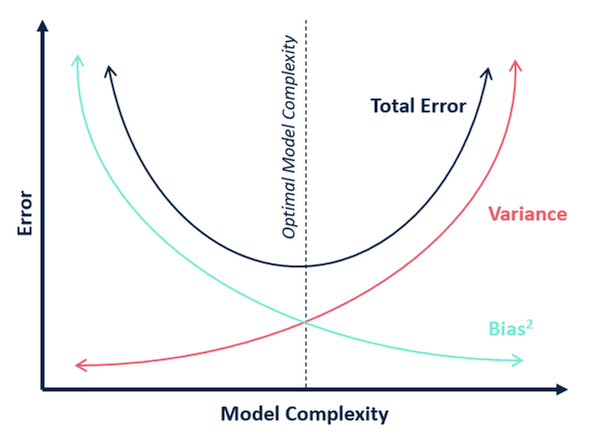




**Although the accuracy is important factor to realize the future performance of model, but Precision and Recall should also be considered**